## Sampling Experiments
1) Unifrom
2) Discrete Gaussian

For each distribution, we first check if the 'n' sampled values follow the same distribution or not usually by plotting frequency distribution graph. 
For discrete gaussian, other experiments are also performed for which the description is given in the subsequent sections.

In [1]:
import sampling as sampling
from utils import frequency_plot
import matplotlib.pyplot as plt

{59: 105, 24: 120, 47: 96, 72: 83, 73: 89, 37: 105, 56: 96, 48: 101, 21: 100, 41: 104, 80: 100, 85: 95, 54: 76, 55: 83, 79: 96, 95: 97, 71: 88, 16: 108, 52: 119, 50: 110, 86: 97, 1: 94, 10: 122, 99: 96, 3: 102, 82: 109, 36: 101, 76: 90, 33: 103, 93: 92, 26: 98, 65: 100, 22: 95, 83: 112, 6: 102, 18: 96, 75: 102, 77: 105, 40: 108, 13: 110, 9: 95, 31: 99, 81: 100, 23: 102, 67: 107, 49: 112, 34: 103, 46: 80, 2: 123, 53: 90, 97: 102, 15: 107, 88: 103, 11: 109, 98: 112, 35: 85, 78: 104, 39: 106, 32: 104, 14: 123, 27: 110, 58: 108, 30: 104, 64: 88, 8: 111, 51: 97, 87: 88, 94: 84, 84: 97, 68: 106, 60: 95, 57: 90, 45: 102, 28: 93, 70: 88, 12: 95, 17: 115, 91: 83, 92: 106, 44: 103, 42: 111, 63: 104, 62: 104, 19: 82, 90: 100, 20: 103, 74: 97, 5: 95, 43: 126, 25: 100, 89: 101, 7: 96, 69: 84, 29: 105, 38: 86, 4: 114, 96: 88, 61: 87, 66: 93, 0: 90}


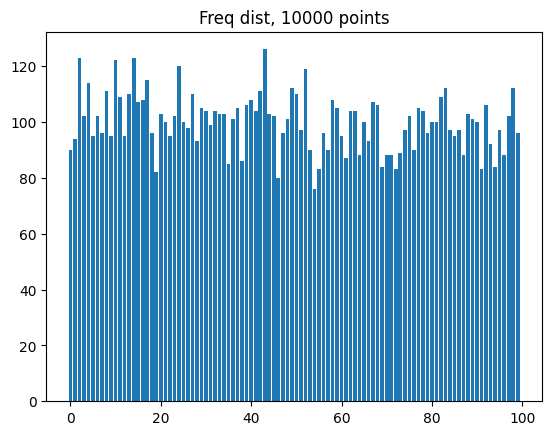

In [2]:
#-- Parameter for unifom distribution --
a, b = 0, 100
number_of_samples = 10000
#---------------------------------------

unif = sampling.Uniform(a,b)
output = unif.sample(number_of_samples)
frequency_plot(output, title = f'Freq dist, {number_of_samples} points')

{-5: 20, -16: 6, -15: 9, 4: 15, 1: 20, 12: 10, 8: 19, -1: 16, -2: 12, 17: 1, -6: 10, 2: 18, 3: 14, -9: 13, -4: 19, 15: 10, 6: 12, -20: 7, -21: 6, -12: 11, 26: 2, -11: 12, 11: 14, 0: 18, -24: 6, 5: 16, -8: 17, 10: 14, 20: 5, -22: 4, -17: 8, 9: 10, -13: 12, -10: 8, 28: 2, -37: 1, 14: 6, -23: 2, 23: 9, 19: 1, -7: 14, 7: 14, 13: 8, 21: 2, -18: 3, -26: 2, -3: 16, -19: 7, 18: 4, -35: 1, -14: 4, -25: 1, 24: 3, 29: 2, 22: 1, 25: 1, -33: 1, 31: 1}


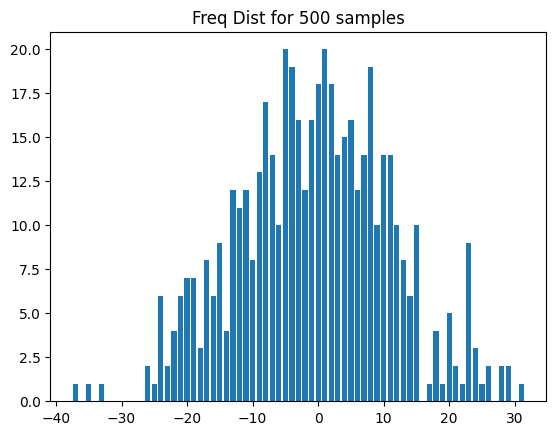

In [4]:
#-- Parameter for gaussian distribution --
center, sigma, tao = 0, 30, 3 ## tailcut is 3\sigma
number_of_samples = 500
#---------------------------------------

gaus = sampling.DiscreteGaussian(center, sigma, tao)
output = gaus.sample(number_of_samples)
# print(output)
frequency_plot(output, title=f'Freq Dist for {number_of_samples} samples')

## Running Experiments on Gaussian Distribution
1) Runtime of rejection sampling: Linear
but the number of samples is 

In [ ]:
#-- Parameter for gaussian distribution --
center, sigma, tao = 0, 10, 3 ## tailcut is 3\sigma
number_of_samples = 10000
#---------------------------------------

gaus = sampling.DiscreteGaussian(center, sigma, tao)
def expected_samples(sampling_method:object):
	x = []
	y = []
	for i in range(0, number_of_samples, 100):
		l = sampling_method.sample(i)
		y.append(sampling_method.counter)
		x.append(i)
	plt.plot(x, y)
	plt.xlabel('Number of Samples')
	plt.ylabel('Total x sampled')
	plt.title(f'center:{sampling_method.t}, tao: {sampling_method.tao}, sigma: {sampling_method.sigma}')
	plt.show()

expected_samples(gaus)

New alpha is 0.7692307692307693
{0: 7676, 7: 7555, 12: 7618, 2: 7767, 4: 7749, 9: 7726, 10: 7701, 3: 7766, 11: 7617, 5: 7692, 1: 7755, 6: 7625, 8: 7753}


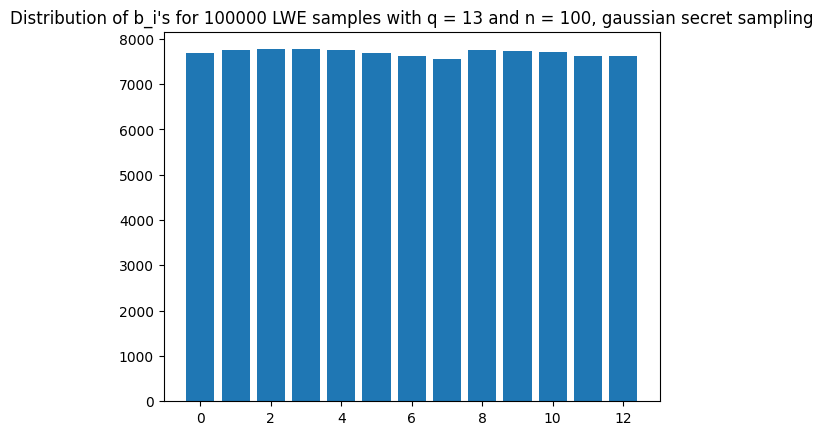

In [2]:
# checking the distribution of b
from lwe import *
number_of_samples = 100000
q = 13
n = 100

param = LweParameter(q = q, n = n, alpha = 0.1, no_samples=number_of_samples, error_sampling= discrete_gaussian_sampling, secret_sampling= discrete_gaussian_sampling)

l = LWE(param)
instances = l.LWE_instances(m = number_of_samples)

b_i = []
for i in instances:
    b_i.append(int(i[1]))
frequency_plot(b_i, f"Distribution of b_i's for {number_of_samples} LWE samples with q = {q} and n = {n}, gaussian secret sampling")


New alpha is 0.7692307692307693
{9: 7638, 2: 7744, 1: 7810, 12: 7691, 6: 7595, 7: 7708, 4: 7820, 8: 7674, 5: 7660, 11: 7679, 0: 7570, 3: 7715, 10: 7696}


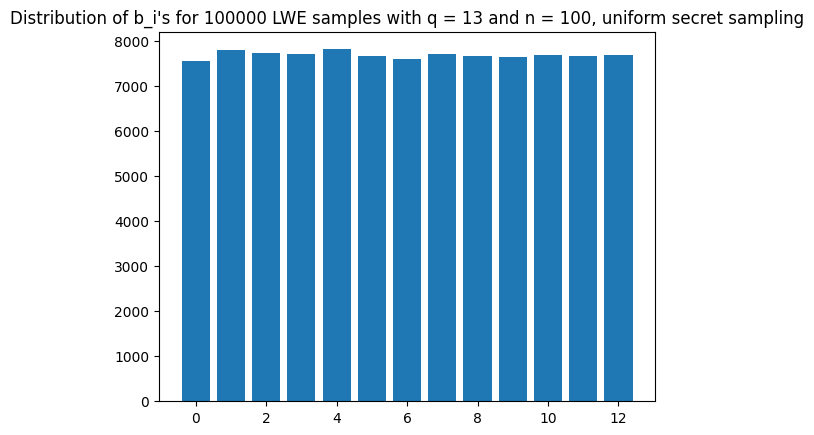

In [3]:
from lwe import *
number_of_samples = 100000
q = 13
n = 100

param = LweParameter(q = q, n = n, alpha = 0.1, no_samples=number_of_samples, error_sampling= discrete_gaussian_sampling, secret_sampling= uniform_sampling)

l = LWE(param)
instances = l.LWE_instances(m = number_of_samples)

b_i = []
for i in instances:
    b_i.append(int(i[1]))
frequency_plot(b_i, f"Distribution of b_i's for {number_of_samples} LWE samples with q = {q} and n = {n}, uniform secret sampling")

New alpha is 0.0390625
{102: 371, 26: 351, 55: 381, 148: 395, 194: 388, 105: 413, 130: 371, 11: 362, 1: 414, 38: 413, 181: 421, 156: 384, 44: 381, 196: 376, 206: 391, 210: 414, 179: 408, 83: 354, 209: 392, 141: 377, 36: 375, 186: 362, 76: 394, 248: 380, 150: 426, 10: 402, 32: 367, 215: 378, 231: 395, 19: 416, 223: 405, 151: 391, 169: 362, 35: 404, 129: 417, 59: 349, 49: 362, 39: 382, 29: 389, 86: 380, 230: 410, 95: 380, 103: 395, 113: 367, 159: 376, 20: 370, 24: 390, 188: 399, 124: 393, 202: 387, 157: 416, 71: 411, 134: 391, 205: 387, 221: 376, 27: 425, 46: 373, 14: 411, 171: 379, 233: 403, 41: 401, 178: 409, 175: 437, 144: 373, 92: 381, 56: 397, 80: 401, 34: 390, 18: 432, 255: 386, 239: 397, 197: 370, 68: 402, 78: 421, 96: 393, 65: 391, 15: 406, 200: 390, 142: 392, 195: 376, 162: 372, 207: 382, 237: 431, 69: 361, 9: 413, 66: 404, 189: 380, 143: 401, 119: 390, 52: 393, 191: 404, 182: 360, 58: 385, 60: 406, 222: 412, 245: 403, 168: 358, 16: 433, 0: 371, 243: 390, 13: 397, 160: 396, 240:

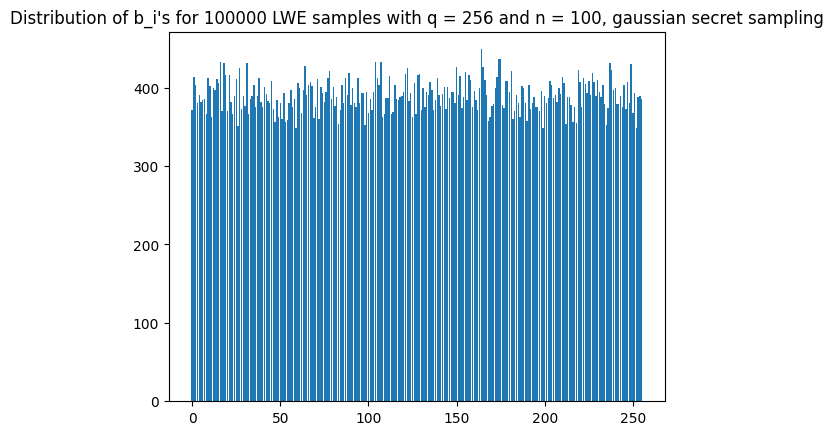

In [4]:
# checking the distribution of b
from lwe import *
number_of_samples = 100000
q = 256
n = 100

param = LweParameter(q = q, n = n, alpha = 0.1, no_samples=number_of_samples, error_sampling= discrete_gaussian_sampling, secret_sampling= discrete_gaussian_sampling)

l = LWE(param)
instances = l.LWE_instances(m = number_of_samples)

b_i = []
for i in instances:
    b_i.append(int(i[1]))
frequency_plot(b_i, f"Distribution of b_i's for {number_of_samples} LWE samples with q = {q} and n = {n}, gaussian secret sampling")


New alpha is 0.0390625
{30: 380, 132: 387, 3: 382, 205: 393, 47: 401, 168: 397, 211: 399, 83: 371, 6: 383, 24: 375, 53: 395, 103: 396, 123: 402, 202: 393, 230: 400, 200: 375, 253: 406, 19: 352, 43: 372, 213: 406, 136: 386, 239: 376, 113: 403, 65: 419, 187: 331, 110: 410, 226: 422, 2: 404, 44: 373, 20: 392, 13: 367, 215: 413, 145: 378, 247: 385, 160: 404, 198: 406, 167: 393, 51: 393, 23: 395, 210: 382, 81: 402, 188: 392, 33: 368, 115: 388, 99: 390, 206: 414, 242: 399, 144: 381, 209: 401, 78: 397, 223: 381, 105: 400, 73: 414, 189: 377, 70: 421, 171: 362, 125: 412, 172: 399, 245: 408, 149: 393, 208: 398, 106: 401, 182: 403, 59: 380, 164: 414, 143: 387, 101: 399, 135: 380, 225: 412, 124: 386, 173: 395, 98: 426, 137: 357, 55: 407, 243: 404, 67: 423, 18: 393, 158: 361, 254: 381, 88: 401, 192: 395, 29: 389, 48: 403, 1: 378, 79: 427, 181: 388, 68: 412, 71: 389, 161: 358, 231: 355, 224: 402, 94: 388, 31: 412, 0: 381, 92: 398, 15: 386, 232: 366, 111: 414, 14: 408, 162: 400, 165: 390, 17: 394, 11

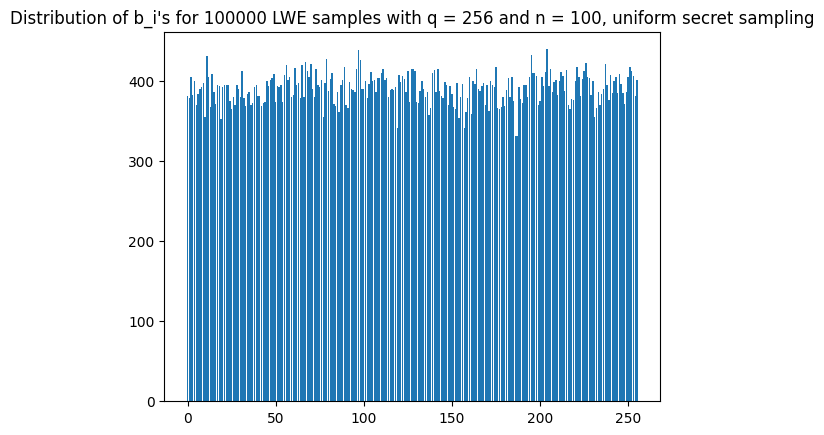

In [5]:
# checking the distribution of b
from lwe import *
number_of_samples = 100000
q = 256
n = 100

param = LweParameter(q = q, n = n, alpha = 0.1, no_samples=number_of_samples, error_sampling= discrete_gaussian_sampling, secret_sampling= uniform_sampling)

l = LWE(param)
instances = l.LWE_instances(m = number_of_samples)

b_i = []
for i in instances:
    b_i.append(int(i[1]))
frequency_plot(b_i, f"Distribution of b_i's for {number_of_samples} LWE samples with q = {q} and n = {n}, uniform secret sampling")
